Question 1

In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
tau[:,0] = 10000
for c in range(C):
    for g in range(1,G):

        # the likelihood*prior as a function of tau
        # is proportional to the full conditional of tau
        # all of which are proportion to the joint as a function of tau
        tau_target = lambda tau_: np.prod(stats.norm(loc=theta[c,g-1],
                                                     scale=1/(tau_)**0.5).pdf(x))*\
                                                     stats.expon(scale=1).pdf(tau_)
                                  # arbitrarily chosen tau prior
        # arbitrarily chosen MH prosal distribution for tau
        tau_propsal = stats.expon(scale=2)
        tau_tilde = tau_propsal.rvs()

        mh_calc = (tau_target(tau_tilde)/tau_target(tau[c,g-1]))*\
         (tau_propsal.pdf(tau[c,g-1])/tau_propsal.pdf(tau_tilde))
        acceptance_probability = min(1, mh_calc)
        if stats.uniform().rvs() < acceptance_probability:
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]

        theta_tilde = stats.norm(loc=theta_t_minus_1, scale=1).rvs()
        theta_target = lambda theta_: np.prod(stats.norm(loc=theta_,
                                                     scale=1/(tau[c,g])**0.5).pdf(x))*stats.norm(loc=0, scale=1).pdf(theta_)
        mh_calc_theta = theta_target(theta_tilde)/theta_target(theta[c,g-1])
        acceptance_probability_theta = min(1, mh_calc_theta)
        if stats.uniform().rvs() < acceptance_probability_theta:
            theta[c,g] = theta_tilde
        else:
            theta[c,g] = theta[c,g-1]



<ipython-input-5-7a40ed4b5f93>:16: RuntimeWarning: divide by zero encountered in scalar divide
  scale=1/(tau_)**0.5).pdf(x))*stats.expon(scale=1).pdf(tau_)
<ipython-input-5-7a40ed4b5f93>:22: RuntimeWarning: invalid value encountered in scalar divide
  mh_calc = (tau_target(tau_tilde)/tau_target(tau[c,g-1]))*(tau_propsal.pdf(tau[c,g-1])/tau_propsal.pdf(tau_tilde))
<ipython-input-5-7a40ed4b5f93>:32: RuntimeWarning: invalid value encountered in scalar divide
  mh_calc_theta = theta_target(theta_tilde)/theta_target(theta[c,g-1])
<ipython-input-5-7a40ed4b5f93>:22: RuntimeWarning: divide by zero encountered in scalar divide
  mh_calc = (tau_target(tau_tilde)/tau_target(tau[c,g-1]))*(tau_propsal.pdf(tau[c,g-1])/tau_propsal.pdf(tau_tilde))


Question 2

In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
s = 2 #adjust scale for truncated normal proposal
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = stats.t(df=5, loc=0, scale=1).rvs(size=C)
tau[:,0] = stats.expon(scale=1).rvs(size=C)

for c in range(C):
    for g in range(1,G):
        tau_t_minus_1 = tau[c, g-1]
        theta_t_munus_1 = theta[c, g-1]


        # the likelihood*prior as a function of tau
        # is proportional to the full conditional of tau
        # all of which are proportion to the joint as a function of tau
        tau_target = lambda tau_: np.prod(stats.norm(loc=theta[c,g-1],
                                                     scale=1/(tau_)**0.5).pdf(x))*\
                                                     stats.expon(scale=1).pdf(tau_)
                                  # arbitrarily chosen tau prior
        # arbitrarily chosen MH prosal distribution for tau
        tau_tilde = stats.truncnorm(a=-tau_t_minus_1/s, b=np.inf,
                loc=tau_t_minus_1, scale=s).rvs()

        mh_calc = (tau_target(tau_tilde)/tau_target(tau_t_minus_1))*\
         (stats.truncnorm.pdf(tau_t_minus_1, a=-tau_tilde/s, b=np.inf,
                loc=tau_tilde, scale=s)/stats.truncnorm.pdf(tau_tilde, a=-tau_t_minus_1/s, b=np.inf,
                loc=tau_t_minus_1, scale=s))

        acceptance_probability = min(1, mh_calc)
        if stats.uniform().rvs() < acceptance_probability:
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau_t_minus_1

        theta_tilde = stats.norm(loc=theta[c,g-1], scale=1).rvs()
        theta_target = lambda theta_: np.prod(stats.norm(loc=theta_,
                                                     scale=1/(tau[c,g])**0.5).pdf(x))*stats.t(df=5, loc=0, scale=1).pdf(theta_)
        mh_calc_theta = theta_target(theta_tilde)/theta_target(theta_t_munus_1)

        acceptance_probability_theta = min(1, mh_calc_theta)
        if stats.uniform().rvs() < acceptance_probability_theta:
            theta[c,g] = theta_tilde
        else:
            theta[c,g] = theta[c,g-1]

Question 3

In [5]:
import numpy as np
from scipy import stats
K = np.array([[.5,.25],[.5,.75]])
T = 200
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])

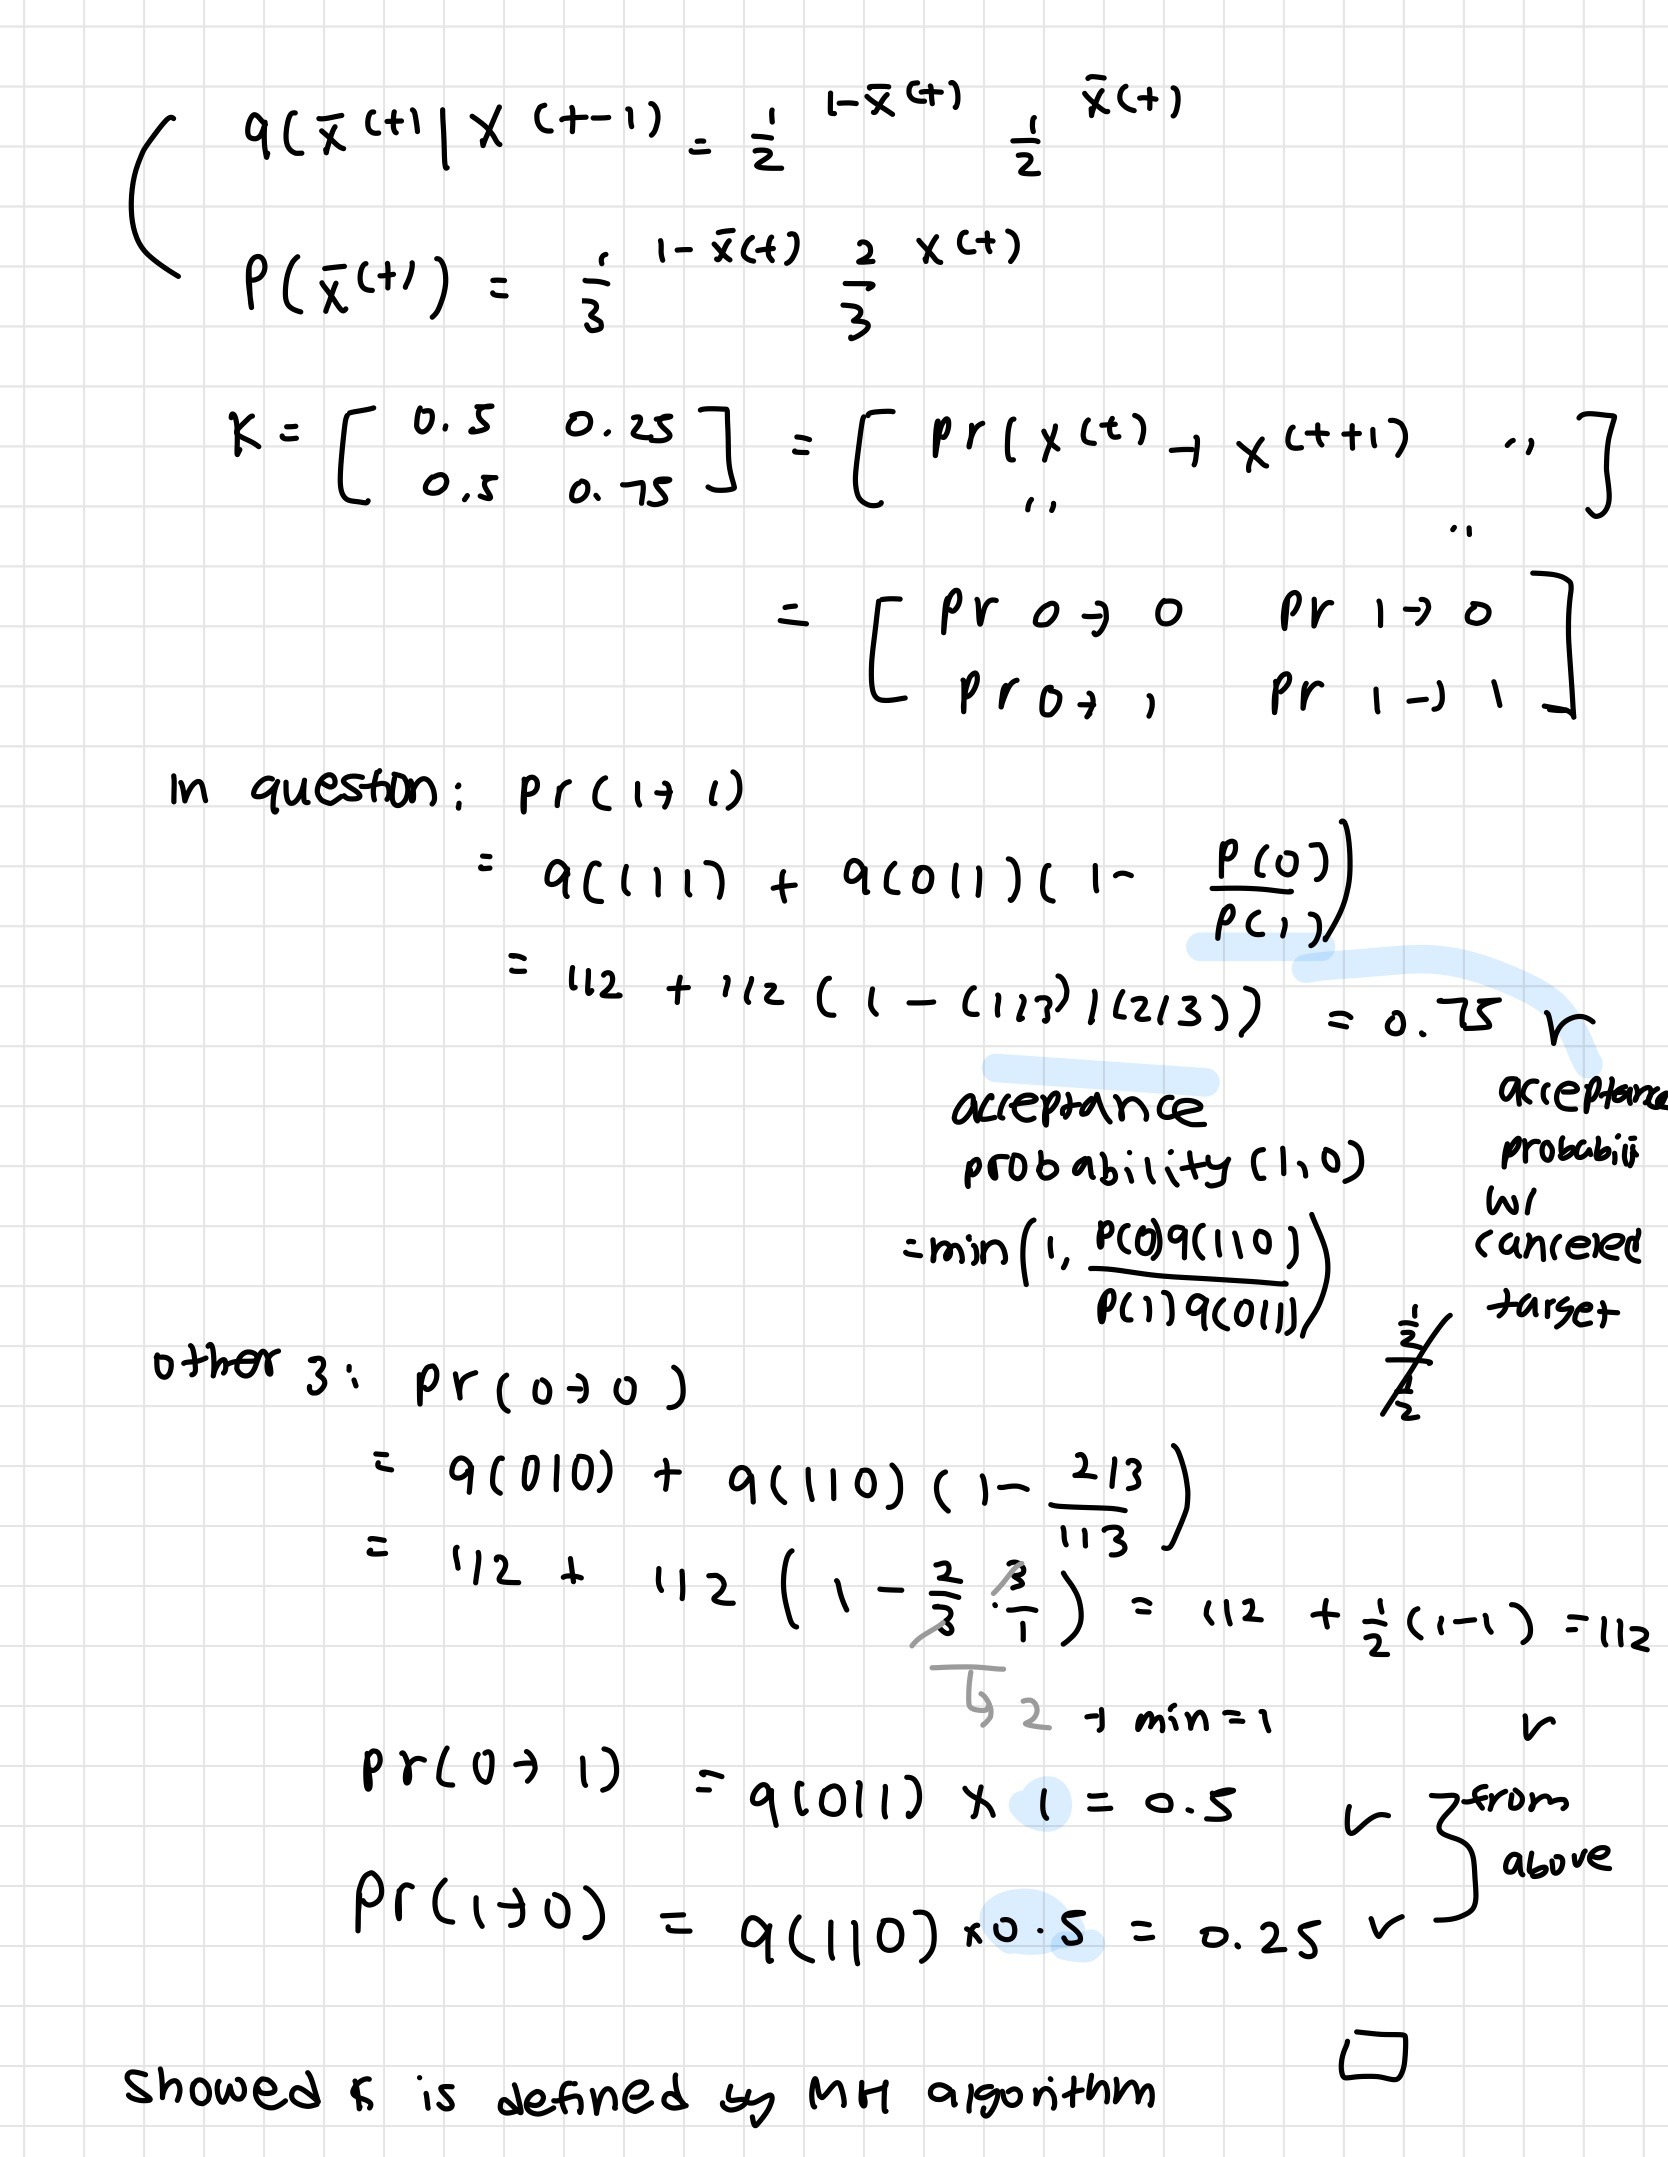